In [ ]:
# MLP for detecting objectivity/subjectivity of a piece of text

In [1]:
import random
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
import numpy as np
import sys
import re
import string
from nltk.corpus import stopwords # stopwords: words that don't really have any meaning (for this MLP)
                                  # only there to make things grammatically correct.
                                  # eg. words like 'the', 'for', 'is', etc.

C:\Users\--\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_path_subj = r"C:\Users\--\Documents\GitHub\fake-news-authentication-platform\subjectivity-dataset\subj.txt" # subjective datasets' file path
data_path_obj = r"C:\Users\--\Documents\GitHub\fake-news-authentication-platform\subjectivity-dataset\obj.txt" # objective datasets' file path

# data_path_subj = os.path.join(os.path.dirname(__file__), 'subjectivity-dataset', 'subj.txt')
# data_path_obj = os.path.join(os.path.dirname(__file__), 'subjectivity-dataset', 'obj.txt')
# not using __file__ because it doesn't work with jupyter

def clean_text(text):
    text = str(text).replace("\n", "") # get rid of all newlines
    exclude = set(string.punctuation) # exclude = string of all punctuations
    text = ''.join(ch for ch in text if ch not in exclude) # we only want words, not punctuation.
    text = text.split(" ") # turn it into a list so that we can iterate over it.
    cleaned_text = [i for i in text if i not in stopwords.words("english")]
    cleaned_text = list(filter(None, cleaned_text)) # get rid of all the empty strings ('') in the list    
    return ' '.join(cleaned_text)

dataset = []

with open(data_path_subj, 'r') as file:
    for line in file:
        dataset.extend([(clean_text(line), 0)]) # 0 is the label for subjective
        
with open(data_path_obj, 'r') as file:
    for line in file:
        dataset.extend([(clean_text(line), 1)]) # 1 is the label for objective

'''
with open(data_path_subj, 'r') as file:
    rawdata = file.read().split('\n') # file.read() returns a string, but with .split(), we turn it into a list.
    dataset.extend([(e, 0) for e in rawdata]) # 0: subj
with open(data_path_obj, 'r') as file:
    rawdata = file.read().split('\n')
    dataset.extend([(e, 1) for e in rawdata]) # 1: obj
'''

random.shuffle(dataset)
train = int(0.9 * len(dataset)) # use 90% of the data for training...
test = len(dataset) - train # ...and 10% for testing.
train_set = dataset[0: min(train, len(dataset))]
test_set = dataset[(-min(test, len(dataset))-1): -1]

training_set_data = [i[0] for i in train_set] # x_train
training_set_labels = [i[1] for i in train_set] # y_train
testing_set_data = [i[0] for i in test_set] # x_val
testing_set_labels = [i[1] for i in test_set] # y_val

max_words = 5000
batch_size = 256


# load dataset
x_train, y_train, x_val, y_val = training_set_data, training_set_labels, testing_set_data, testing_set_labels 

# prepare data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_matrix(x_train)
x_val = tokenizer.texts_to_matrix(x_val)
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)



Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 5s 541us/step - loss: 0.6880 - acc: 0.5528 - val_loss: 0.6780 - val_acc: 0.6580
Epoch 2/50
9000/9000 [==============================] - 3s 367us/step - loss: 0.6675 - acc: 0.6566 - val_loss: 0.6553 - val_acc: 0.7400
Epoch 3/50
9000/9000 [==============================] - 3s 369us/step - loss: 0.6408 - acc: 0.7241 - val_loss: 0.6263 - val_acc: 0.7860
Epoch 4/50
9000/9000 [==============================] - 3s 367us/step - loss: 0.6088 - acc: 0.7584 - val_loss: 0.5908 - val_acc: 0.8180
Epoch 5/50
9000/9000 [==============================] - 3s 371us/step - loss: 0.5700 - acc: 0.7860 - val_loss: 0.5510 - val_acc: 0.8280
Epoch 6/50
9000/9000 [==============================] - 3s 374us/step - loss: 0.5301 - acc: 0.8011 - val_loss: 0.5123 - val_acc: 0.8430
Epoch 7/50
9000/9000 [==============================] - 3s 383us/step - loss: 0.4926 - acc: 0.8162 - val_loss: 0.4780 - val_acc: 0.8480


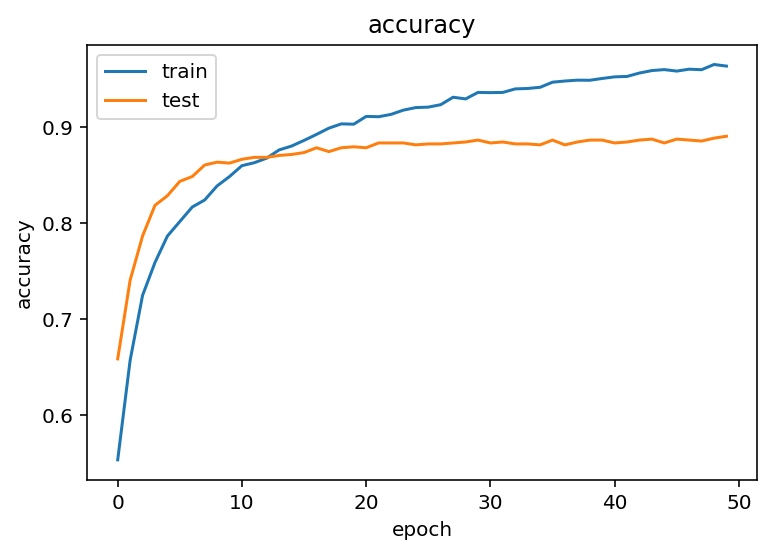

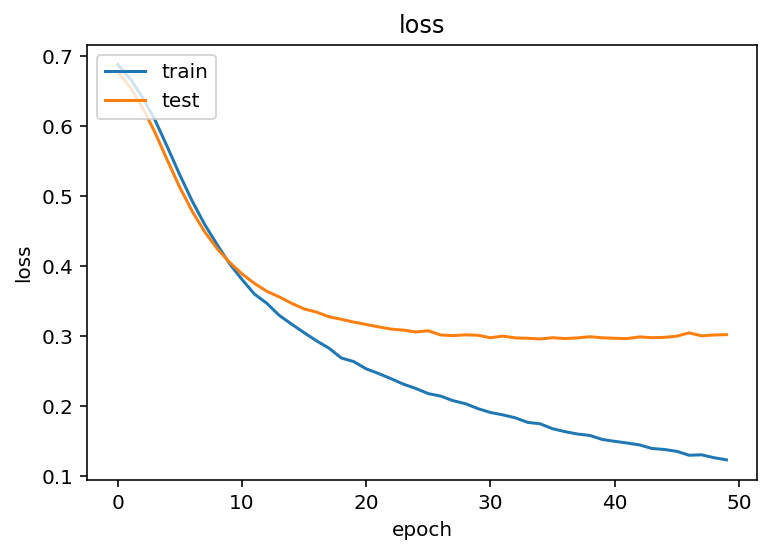

In [3]:
# build model
from keras import optimizers

epochs = 50

model = Sequential()

model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # 0.25 is the 'sweet spot'

model.add(Dense(2))
model.add(Activation('softmax'))

# losses: categorical_crossentropy, adam, 0.24 dropout -> accuracy was 0.85 and 0.88
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

              # show graph of loss and accuracy

# train model
model_log = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

# visualise results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




             precision    recall  f1-score   support

   positive       0.91      0.87      0.89       512
   negative       0.87      0.91      0.89       488

avg / total       0.89      0.89      0.89      1000



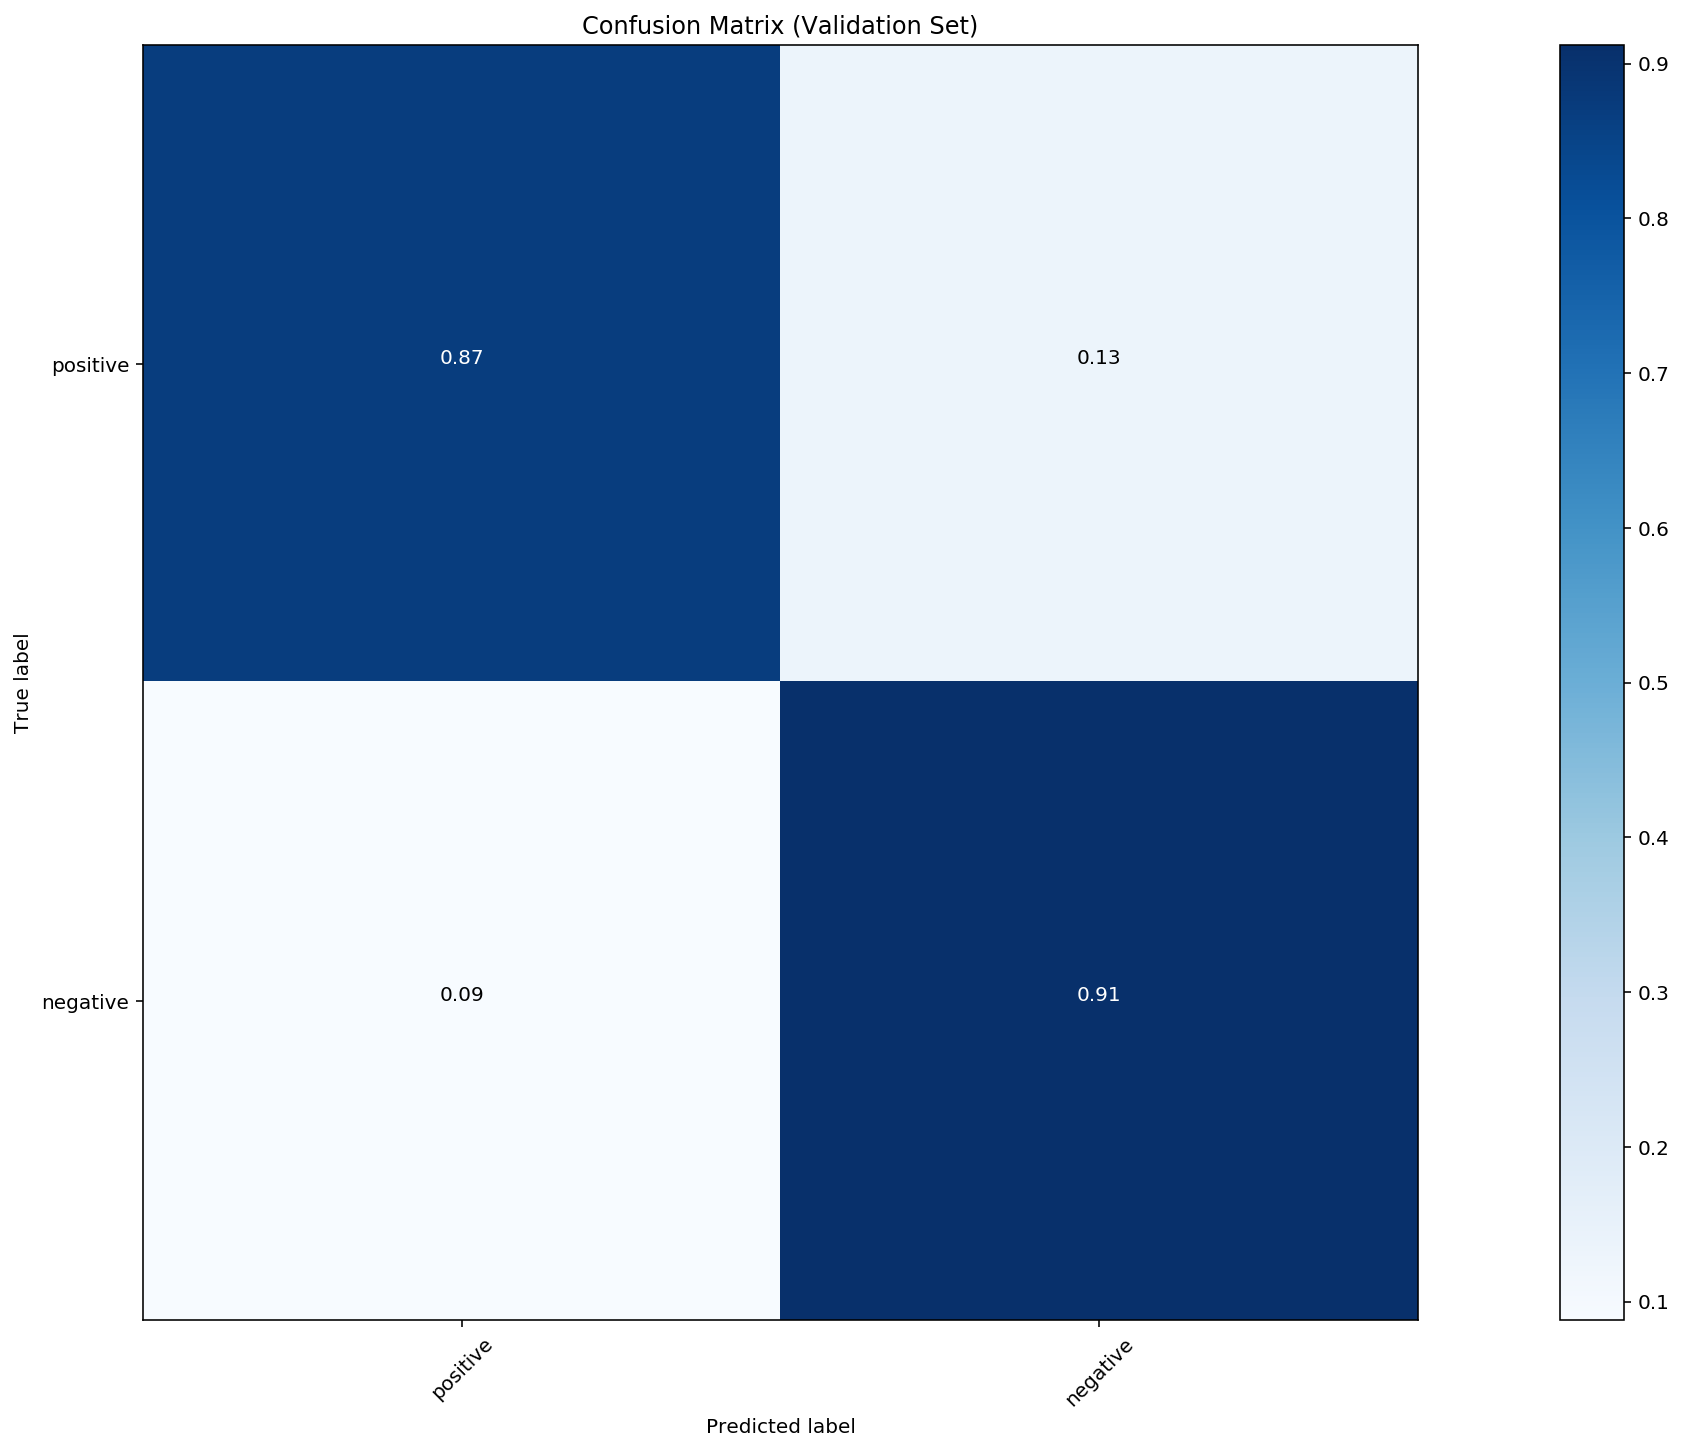

In [4]:
# draw confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools, pickle

classes = ["positive", "negative"]

Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)
print(classification_report(Y_test, y_pred_class, target_names=classes))

def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)